In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='lagoon'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

M8N=dict()
M8=dict()


for i in range(len(samples)):
    M8N[i]=samples[0][i]
    
for i in range(len(samples)):
    M8[i]=pd.read_csv('SFdata//'+M8N[i]+'.csv')    

samples

,0
0,1987OdCast6523A
1,1987OdCast6523B
2,Lagoon1
3,Lagoon2
4,M8H2


In [4]:
M8[3].S

0      0.545494
1      1.277148
2      1.196893
3      2.013692
4      2.618692
5      3.627896
6      4.363997
7      6.127321
8      8.227001
9     11.611698
10    14.069574
11    13.006217
12    12.006459
13    16.277959
14    23.207819
15    32.025263
16    48.711793
Name: S, dtype: float64

In [5]:
B=M8[3].S[1:100]
r=M8[3].pc[1:100]

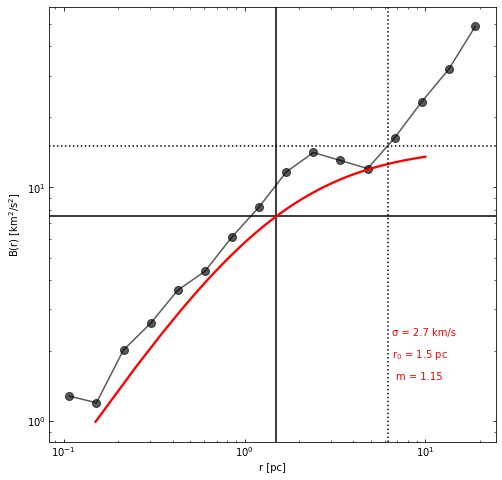

In [6]:
fig, ax=plt.subplots(figsize=(8,8))


plt.loglog(r,B,marker='o',color="black",alpha=0.65,markersize="8")

plt.axhline(y=2.74**2, color='black', linestyle='-')
plt.axhline(y=2*2.74**2, color='black', linestyle=':')
plt.axvline(x=1.5, color='black', linestyle='-')


lo=1.5
ss=2.74**2
n=1.15
x=np.linspace(0.15,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

r2 = np.interp(2*ss, M8[3].S, M8[3].pc)
r2
plt.axvline(x=r2, color='black', linestyle=':')

ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

In [7]:
len(M8[3])

17

In [8]:
rgrid = np.logspace(0.0, 2)

s0 = (0.242*.92)/2.355             
m = 1.15

sig2 = ss
r0 = 1.5

In [9]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [10]:
relative_uncertainty = 0.2
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 2.0

In [11]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [29]:
result2 = model02.fit(
    B[:-2], 
    weights=weights[:-2],
    r=r[:-2], r0=r0, m=m, s0=s0, noise=1/10, sig2=sig2
)

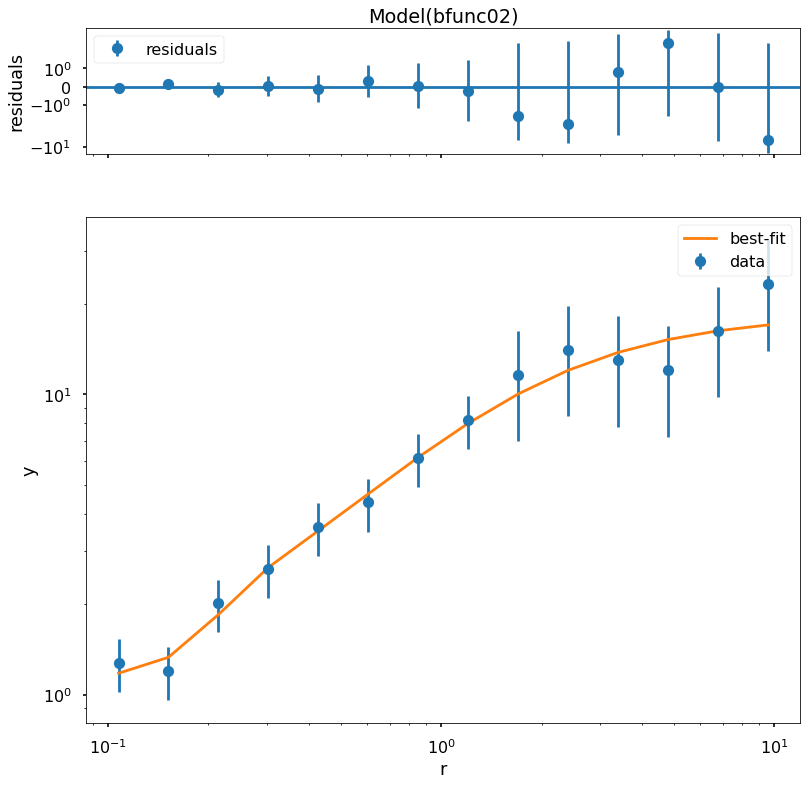

In [13]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);

In [31]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 122
    # data points      = 14
    # variables        = 5
    chi-square         = 1.95924970
    reduced chi-square = 0.21769441
    Akaike info crit   = -17.5309403
    Bayesian info crit = -14.3356536
[[Variables]]
    r0:     1.63224166 +/- 0.50850835 (31.15%) (init = 1.5)
    sig2:   8.62733041 +/- 1.57007879 (18.20%) (init = 7.5076)
    m:      1.37154999 +/- 0.21456940 (15.64%) (init = 1.15)
    s0:     0.09727821 +/- 0.02089584 (21.48%) (init = 0.09453928)
    noise:  1.14366269 +/- 0.12286223 (10.74%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r0, sig2)  =  0.939
    C(r0, m)     = -0.899
    C(sig2, m)   = -0.762
    C(s0, noise) =  0.630
    C(m, s0)     = -0.483
    C(r0, s0)    =  0.416
    C(sig2, s0)  =  0.296


In [32]:
#for p in result2.model.param_names:
#    result2.params[p].stderr = result2.params[p].value * 0.1

In [33]:
result2.conf_interval()
print(result2.ci_report())

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=-0.027485181481892062 < 1e-05 at iteration 50 and prob(r0=27.057659145432318) = 0.9698794910766703 < max(sigmas).
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=-0.03469620092483284 < 1e-05 at iteration 3 and prob(s0=0.0345906913149293) = 0.9219038693704735 < max(sigmas).
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=-0.011716416608276702 < 1e-05 at iteration 4 and prob(noise=0.6522137847601566) = 0.9114938530500363 < max(sigmas).
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.92593  -0.67518  -0.39988   1.63224  +0.92179  +9.67348      +inf
 sig2 :  -4.06856  -2.67900  -1.41812   8.62733  +2.31886 +13.46098+166.52628
 m    :  -0.87814  -0.55144  -0.23512   1.37155  +0.23456  +0.47311  +1.03627
 s0   :      -inf      -inf  -0.01639   0.09728  +0.01896  +0.04699  +0.09851
 noise:      -inf      -inf  -0.12414   1.14366  +0.11335  +0.23926  +0.40475


In [34]:
plt.style.use([
    "seaborn-poster",
])

In [35]:
plot_limits = {
    "s0": [0.0, 0.3],
    "m": [0.5, 2.5],
    "r0": [0.5, 5.0],
    "noise": [0.0, 2.0],
    "sig2": [3.0, 14.0],
}

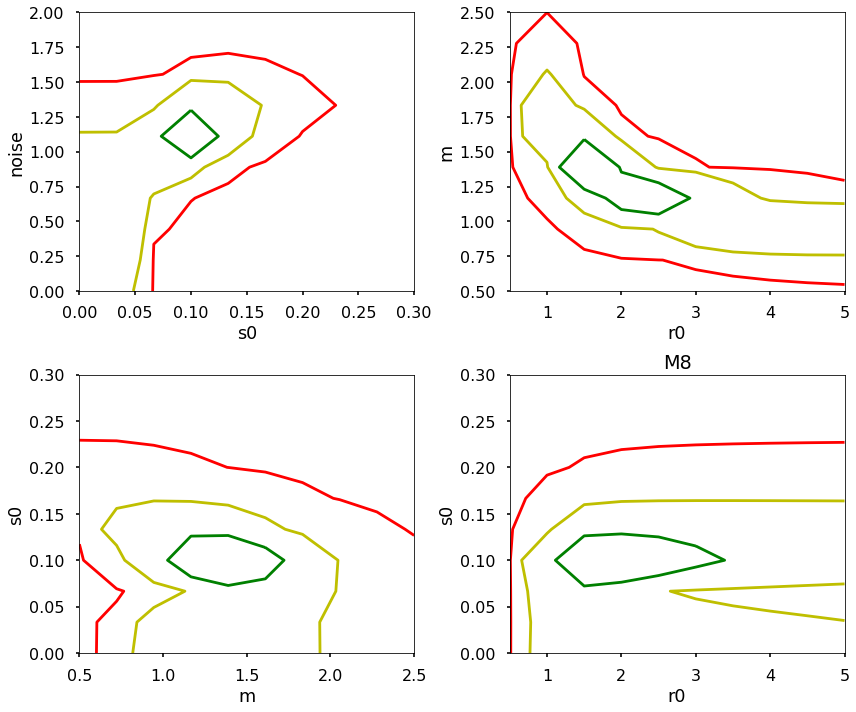

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 10, 10,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

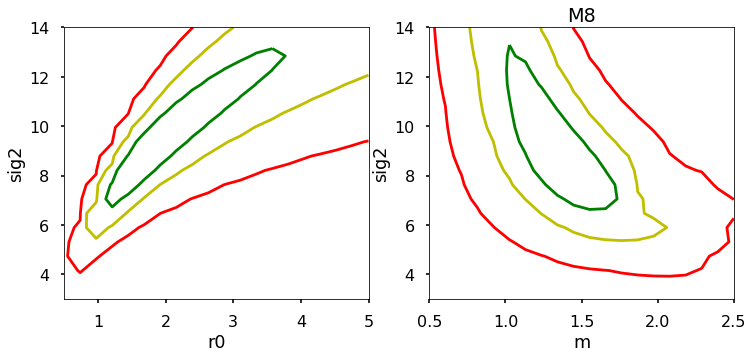

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["r0", "sig2"],
    ["m", "sig2"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 20, 20,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 1291.9136791229248 seconds ---
